In [1]:
#creating companies dataframe
import numpy as np 
import pandas as pd 

df1 =  pd.read_csv("C:/Users/Venktesh/Desktop/Data Science - Fractal Analytics January 2019 Home _ UpGrad_files/group project/companies.txt", sep = '\t', encoding = 'ISO-8859-1')
df1.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [2]:
#creating rounds dataframe
df2 =  pd.read_csv("C:/Users/Venktesh/Desktop/Data Science - Fractal Analytics January 2019 Home _ UpGrad_files/group project/rounds2.csv",  encoding = 'ISO-8859-1')
df2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [3]:
#unique companies in companies dataframe
len(df1.permalink.unique().tolist())

66368

In [4]:
#converting company_permalink  to lower case and displaying no of unique companies
df2['company_permalink'] = df2['company_permalink'].str.lower()
len(df2.company_permalink.unique().tolist())

66370

In [5]:
#creating master frame 
df1['permalink'] = df1['permalink'].str.lower()
master_frame = df2.merge(df1, right_on="permalink",  left_on="company_permalink", how="inner")
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [6]:
len(master_frame.permalink.tolist())

114942

In [7]:
#finding aversge ammound raised for each given type
dfm=df2.groupby('funding_round_type').mean()
dfm.loc[['venture','angel','seed','private_equity']]

,raised_amount_usd
funding_round_type,
venture,1.174895e+07
angel,9.586945e+05
seed,7.198180e+05
private_equity,7.330859e+07


In [8]:
#Investment type most suitable for spark fund i.e. whose raise amount lies between 5 to 15 million
dfm[(dfm.raised_amount_usd>5000000)&(dfm.raised_amount_usd<15000000)]

,raised_amount_usd
funding_round_type,
venture,1.174895e+07


In [9]:
#creating frame for only venture investment type
aster_frame = master_frame[master_frame['funding_round_type'].isin(['venture'])]
len(aster_frame.permalink.tolist())

55493

In [10]:
#finding top 9 countries 
top9 = aster_frame.groupby(['country_code'])['raised_amount_usd'].sum()
top9 = pd.DataFrame(top9.sort_values(ascending=False).apply(lambda x:round(x,2))[:9])
top_countries=top9.index
top9.head(9)

,raised_amount_usd
country_code,
USA,4.225108e+11
CHN,3.983542e+10
GBR,2.024563e+10
IND,1.439186e+10
CAN,9.583332e+09
FRA,7.259537e+09
ISR,6.907515e+09
DEU,6.346960e+09
JPN,3.363677e+09


In [11]:
#top 3 english speaking countries
top3_eng=[top_countries[0],*top_countries[2:4]]

English speaking countries are: USA, GBR, IND, CAN in the top9 dataframe and among them top 3 are USA, GBR, IND 

In [12]:
df6=pd.read_csv("C:/Users/Venktesh/Desktop/Data Science - Fractal Analytics January 2019 Home _ UpGrad_files/group project/mapping.csv",encoding = "ISO-8859-1")

#Renaming category_list to primary_sector and replacing '0' with 'na'
df6=df6.rename(columns={'category_list':'primary_sector'})
df6['primary_sector']=df6['primary_sector'].apply(lambda x:str(x).replace('0','na').lower())

# Finding which main sectors categories belong to
melted_sectors=pd.melt(df6,id_vars="primary_sector",var_name="main_sector",value_name="id")
mapping_category_main_sectors=melted_sectors[(melted_sectors.id==1)][["primary_sector","main_sector"]]

In [13]:
def prim_sector(x):
    try:
        if x.find('|')!=-1:
            return x[:x.find('|')].lower()
        else:
            return x.lower()
    except:
        return pd.NaT

# Stripping primary sector name from category_list in master_Frame
master_frame["primary_sector"]=master_frame.category_list.apply(prim_sector)

In [14]:
#Merging master frame with the concatinated dataframe 
master_frame=pd.merge(master_frame,mapping_category_main_sectors,how='inner',on='primary_sector')
len(master_frame)

111437

In [15]:
C1=master_frame[(master_frame.country_code=='USA')& (master_frame.funding_round_type=='venture')&(master_frame.raised_amount_usd>=5e6)&(master_frame.raised_amount_usd<=15e6)]
C1.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
10,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,media,Entertainment
43,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,5000000.0,/organization/chefs-feed,ChefsFeed,http://www.chefsfeed.com,Media|Mobile|Restaurants|Technology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,media,Entertainment
98,/organization/huffingtonpost,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,A,01-08-2006,5000000.0,/organization/huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,media,Entertainment
99,/organization/huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,B,01-09-2007,5000000.0,/organization/huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,media,Entertainment
134,/organization/matchmine,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,A,01-09-2007,10000000.0,/organization/matchmine,MatchMine,http://matchmine.com,Media|News|Reviews and Recommendations,closed,USA,MA,Boston,Needham,01-01-2007,media,Entertainment


In [16]:
#Finding total investment amount,total number of investment for USA and same for top 3 sectors of USA 
master_frame.rename(columns={'main_sector_x':'main_sector','value_y':'value'}, inplace=True)
C1=master_frame[(master_frame.country_code=='USA')& (master_frame.funding_round_type=='venture')&(master_frame.raised_amount_usd>=5e6)&(master_frame.raised_amount_usd<=15e6)]
C1.head()
C1agg=C1.groupby(['main_sector']).agg({'raised_amount_usd':'sum','main_sector':'count'})
C1agg=C1agg.rename(columns={'main_sector':'number_investment_in_main_sector','raised_amount_usd':'total_investment_in_main_sector'})
C1=pd.merge(C1,C1agg,left_on='main_sector',right_index=True,how='inner')
total_number_investment_2=C1agg.number_investment_in_main_sector.sum()
print(total_number_investment_2)
total_amount_investment_2=C1agg.total_investment_in_main_sector.sum()
print(total_amount_investment_2)
C1agg=C1agg.sort_values('number_investment_in_main_sector',ascending=False)
print(C1agg.head(3))
top_company_name_1=C1[(C1.main_sector==C1agg.index[0])].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).index[0]
second_company_name_2=C1[(C1.main_sector==C1agg.index[1])].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).index[0]
print(top_company_name_1)
print(second_company_name_2)

12063
107757097294.0
                                         total_investment_in_main_sector  \
main_sector                                                                
Others                                                      2.632101e+10   
Social, Finance, Analytics, Advertising                     2.380738e+10   
Cleantech / Semiconductors                                  2.163343e+10   

                                         number_investment_in_main_sector  
main_sector                                                                
Others                                                               2950  
Social, Finance, Analytics, Advertising                              2714  
Cleantech / Semiconductors                                           2350  
Virtustream
SST Inc. (Formerly ShotSpotter)


For USA
Total number of Investments:12063
Total amount of Investments:107757097294.0
    Top three main sectors are                | Total_investment_in_main_sector | Total_number_investment_in_main_sector
    1.Other                                   | 2.632101e+10                    |2950
    2.Social, Finance, Analytics, Advertising | 2.380738e+10                    |2714
    3.Cleantech / Semiconductors              | 2.163343e+10                    |2350
    
Top two companies are
1.Virtustream
2.SST Inc. (Formerly ShotSpotter)

In [17]:
#Finding total investment amount,total number of investment for GBR and same for top 3 sectors of GBR 
master_frame.rename(columns={'main_sector_x':'main_sector','value_y':'value'}, inplace=True)
C2=master_frame[(master_frame.country_code=='GBR')& (master_frame.funding_round_type=='venture')&(master_frame.raised_amount_usd>=5e6)&(master_frame.raised_amount_usd<=15e6)]
C2.head()
C2agg=C2.groupby(['main_sector']).agg({'raised_amount_usd':'sum','main_sector':'count'})
C2agg=C2agg.rename(columns={'main_sector':'number_investment_in_main_sector','raised_amount_usd':'total_investment_in_main_sector'})
C2=pd.merge(C2,C2agg,left_on='main_sector',right_index=True,how='inner')
total_number_investment_2=C2agg.number_investment_in_main_sector.sum()
print(total_number_investment_2)
total_amount_investment_2=C2agg.total_investment_in_main_sector.sum()
print(total_amount_investment_2)
C2agg=C2agg.sort_values('number_investment_in_main_sector',ascending=False)
print(C2agg.head(3))
top_company_name_1=C2[(C2.main_sector==C2agg.index[0])].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).index[0]
second_company_name_2=C2[(C2.main_sector==C2agg.index[1])].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).index[0]
print(top_company_name_1)
print(second_company_name_2)

621
5379078691.0
                                         total_investment_in_main_sector  \
main_sector                                                                
Others                                                      1.283624e+09   
Social, Finance, Analytics, Advertising                     1.089404e+09   
Cleantech / Semiconductors                                  1.163990e+09   

                                         number_investment_in_main_sector  
main_sector                                                                
Others                                                                147  
Social, Finance, Analytics, Advertising                               133  
Cleantech / Semiconductors                                            130  
Electric Cloud
Celltick Technologies


For GBR
Total number of Investments:621
Total amount of Investments:5379078691.0
    Top three main sectors are                | Total_investment_in_main_sector | Total_number_investment_in_main_sector
    1.Other                                   | 1.283624e+09                    |147
    2.Social, Finance, Analytics, Advertising | 1.089404e+09                    |133
    3.Cleantech / Semiconductors              | 1.163990e+09                    |130
    
Top two companies are
1.Electric Cloud
2.Celltick Technologies

In [18]:
#Finding total investment amount,total number of investment for IND and same for top 3 sectors of IND 
master_frame.rename(columns={'main_sector_x':'main_sector','value_y':'value'}, inplace=True)
C3=master_frame[(master_frame.country_code=='IND')& (master_frame.funding_round_type=='venture')&(master_frame.raised_amount_usd>=5e6)&(master_frame.raised_amount_usd<=15e6)]
C3.head()
C3agg=C3.groupby(['main_sector']).agg({'raised_amount_usd':'sum','main_sector':'count'})
C3agg=C3agg.rename(columns={'main_sector':'number_investment_in_main_sector','raised_amount_usd':'total_investment_in_main_sector'})
C3=pd.merge(C3,C3agg,left_on='main_sector',right_index=True,how='inner')
total_number_investment_2=C3agg.number_investment_in_main_sector.sum()
print(total_number_investment_2)
total_amount_investment_2=C3agg.total_investment_in_main_sector.sum()
print(total_amount_investment_2)
C3agg=C3agg.sort_values('number_investment_in_main_sector',ascending=False)
print(C3agg.head(3))
top_company_name_1=C3[(C3.main_sector==C3agg.index[0])].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).index[0]
second_company_name_2=C3[(C3.main_sector==C3agg.index[1])].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).index[0]
print(top_company_name_1)
print(second_company_name_2)

328
2949543602.0
                                         total_investment_in_main_sector  \
main_sector                                                                
Others                                                      1.013410e+09   
Social, Finance, Analytics, Advertising                     5.505496e+08   
News, Search and Messaging                                  4.338345e+08   

                                         number_investment_in_main_sector  
main_sector                                                                
Others                                                                110  
Social, Finance, Analytics, Advertising                                60  
News, Search and Messaging                                             52  
FirstCry.com
Manthan Systems


For IND
Total number of Investments:328
Total amount of Investments:2949543602.0
    Top three main sectors are                | Total_investment_in_main_sector | Total_number_investment_in_main_sector
    1.Other                                   | 1.013410e+09                    |110
    2.Social, Finance, Analytics, Advertising | 5.505496e+08                    |60
    3.News, Search and Messaging              | 4.338345e+08                    |52
    
Top two companies are
1.FirstCry.com
2.Manthan Systems

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'Average_round_type_in_USD_m')

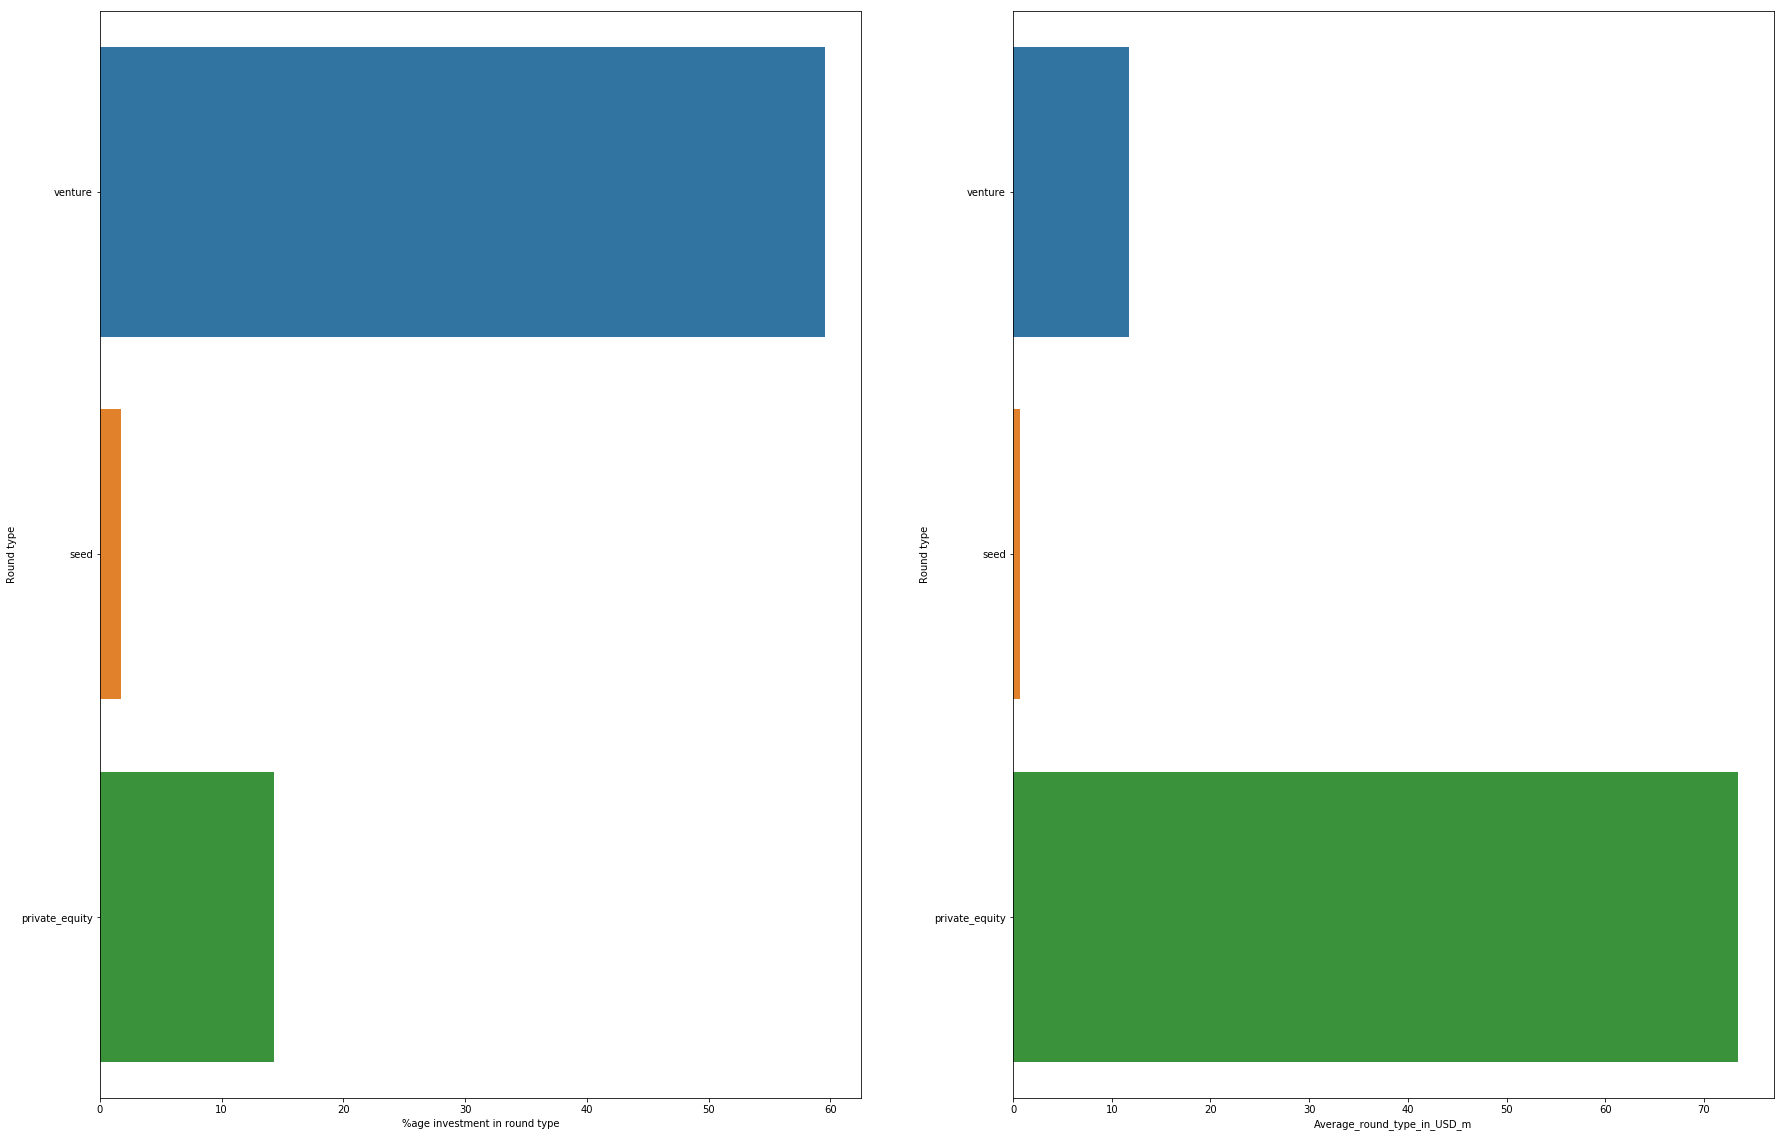

In [20]:
percent_by_roundt= master_frame.groupby('funding_round_type')['raised_amount_usd'].sum()*100/master_frame.raised_amount_usd.sum()
percent_by_roundt= percent_by_roundt.rename('%age_by_round_type')
average_by_roundt= master_frame.groupby('funding_round_type')['raised_amount_usd'].mean()
average_by_roundt= average_by_roundt.rename('average_round_type_in_USD_m')
data1=pd.concat([percent_by_roundt,average_by_roundt/10**6],axis=1).loc[['venture','seed','private_equity']]



plt.figure(figsize=(30,20))

# First subplot covering the %age investment by round type
plt.subplot(1,2,1)
sns.barplot(x=data1['%age_by_round_type'],y=data1.index)
plt.ylabel('Round type')
plt.xlabel('%age investment in round type')

#second subplot covering average investment usd by round type
plt.subplot(1,2,2)
sns.barplot(x=data1['average_round_type_in_USD_m'],y=data1.index)
plt.ylabel('Round type')
plt.xlabel('Average_round_type_in_USD_m')

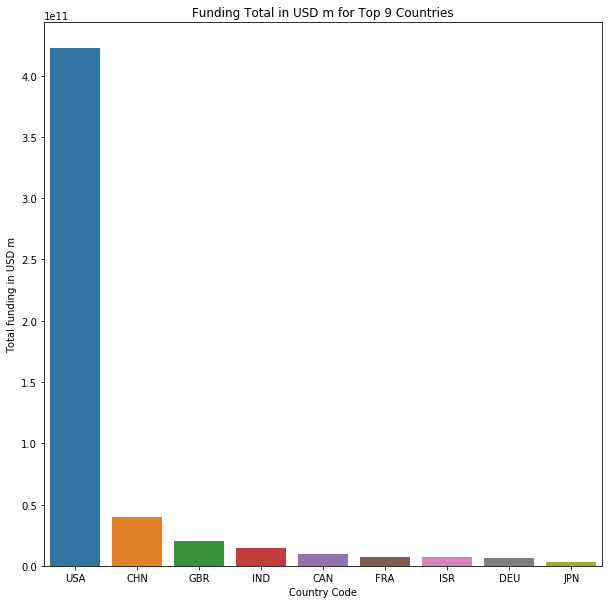

In [21]:
# Plot 2

plt.figure(figsize=(10,10))

sns.barplot(y=top9['raised_amount_usd'],x=top9.index)

# Set plot title
plt.title('Funding Total in USD m for Top 9 Countries')
# Set x-axis label
plt.xlabel('Country Code')
# Set y-axis label
plt.ylabel('Total funding in USD m')
plt.show()

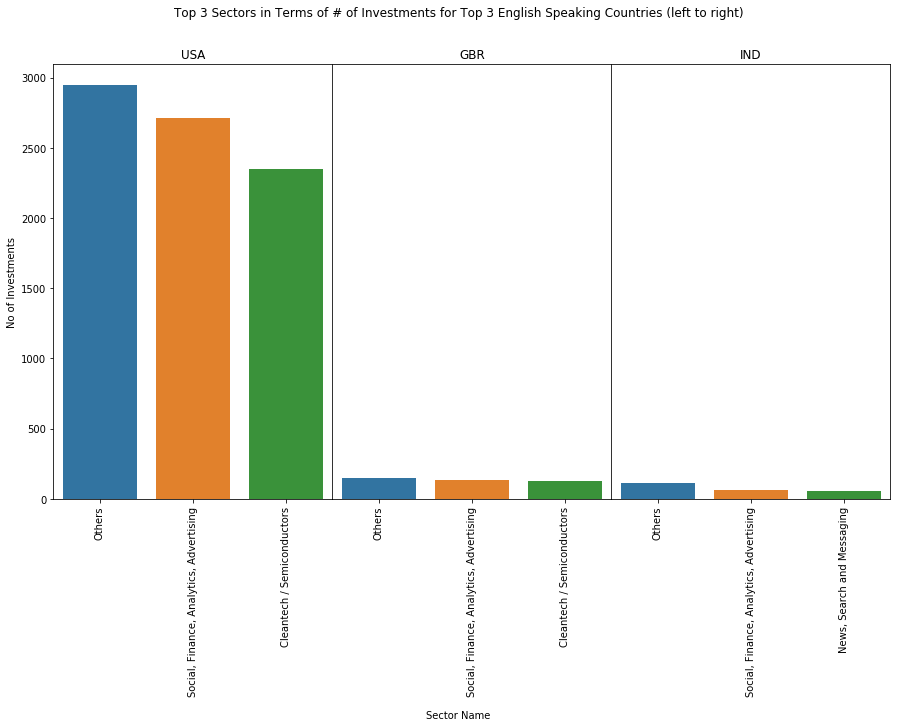

In [26]:
# Plot 3
fig=plt.figure(figsize=(15,8))


# For top English speaking country
plt.subplot(1,3,1)

sns.barplot(x=C1agg.index[:3],y=C1agg['number_investment_in_main_sector'][:3])
plt.title(top3_eng[0])
plt.ylabel('No of Investments')
plt.ylim(0,max(C1agg['number_investment_in_main_sector'])*1.05)

plt.xticks(rotation=90)
plt.xlabel('')


# For second-best English speaking country
plt.subplot(1,3,2)

sns.barplot(x=C2agg.index[:3],y=C2agg['number_investment_in_main_sector'][:3])
plt.title(top3_eng[1])
plt.ylabel('')
plt.yticks([])
plt.ylim(0,max(C1agg['number_investment_in_main_sector'])*1.05)

plt.xticks(rotation=90)
plt.xlabel('')


# For third-best English speaking country
plt.subplot(1,3,3)

sns.barplot(x=C3agg.index[:3],y=C3agg['number_investment_in_main_sector'][:3])
plt.title(top3_eng[2])
plt.ylabel('')
plt.yticks([])
plt.ylim(0,max(C1agg['number_investment_in_main_sector'])*1.05)

plt.xticks(rotation=90)
plt.xlabel('')

# Giving name to the common x-axis as well as the title for the figure 
fig.text(0.5, -0.25, 'Sector Name', ha='center', va='center')
plt.suptitle('Top 3 Sectors in Terms of # of Investments for Top 3 English Speaking Countries (left to right)')
plt.subplots_adjust(wspace=0)

plt.show()